# Wine Dataset

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results using the leave-one-out technique)

   In a classification context, this is a well posed problem 
   with "well behaved" class structures. A good data set 
   for first testing of a new classifier, but not very 
   challenging.

   (2) 
   S. Aeberhard, D. Coomans and O. de Vel,
   "THE CLASSIFICATION PERFORMANCE OF RDA"
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics).

   Here, the data was used to illustrate the superior performance of
   the use of a new appreciation function with RDA. 

4. Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

5. Number of Instances

      	class 1 59
	class 2 71
	class 3 48

6. Number of Attributes 
	
	13

7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

8. Missing Attribute Values:

	None

9. Class Distribution: number of instances per class

      	class 1 59
	class 2 71
	class 3 48

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## Loading dataset

In [3]:
columns_names = ['Target','Alcohol','Malic acid','Ash','Alcalinity of ash',
                 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
                 'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines',
                 'Proline']
ds = pd.read_csv('../datasets/Wine/wine.csv', header=-1, names=columns_names)

In [4]:
ds.head()

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#Target column 'quality'

X = ds.drop(columns=['Target'])
X.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
y = ds['Target']
y.describe()

count    178.000000
mean       1.938202
std        0.775035
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Target, dtype: float64

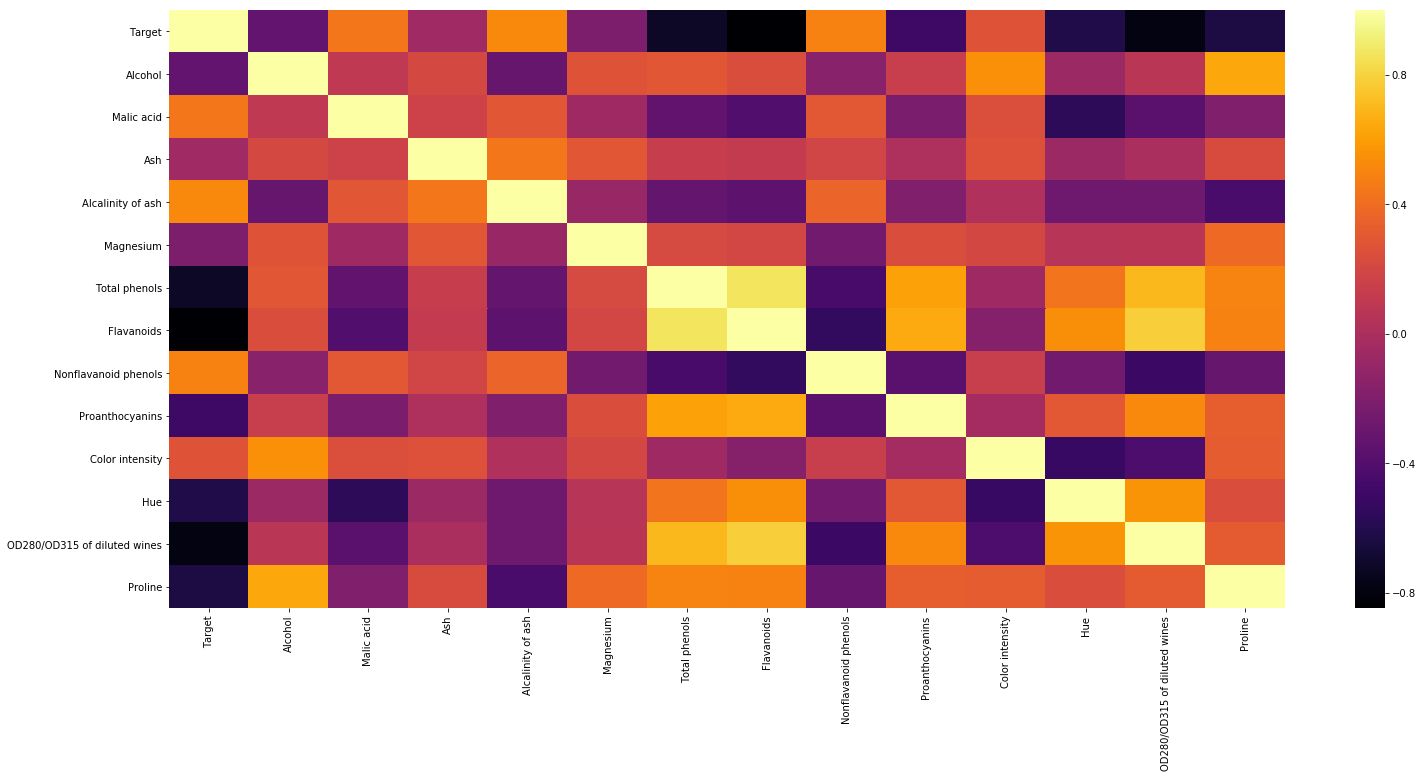

In [7]:
scaler = StandardScaler()
scaler.fit(ds)
df_corr = pd.DataFrame(scaler.transform(ds), columns = ds.columns)
corr = df_corr.corr()
plt.figure(figsize=(25,11))
sns.heatmap(corr, cmap = 'inferno')
plt.show()


In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.tight_layout()

Fold 1
Accuracy=0.956
F1 score=0.956

Confusion matrix, without normalization
[[15  0  0]
 [ 2 16  0]
 [ 0  0 12]]


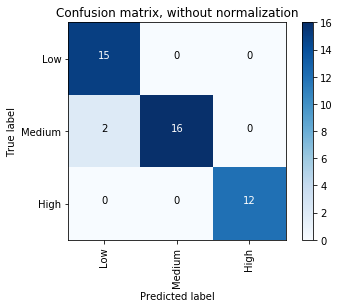

Fold 2
Accuracy=0.978
F1 score=0.978

Confusion matrix, without normalization
[[15  0  0]
 [ 0 17  1]
 [ 0  0 12]]


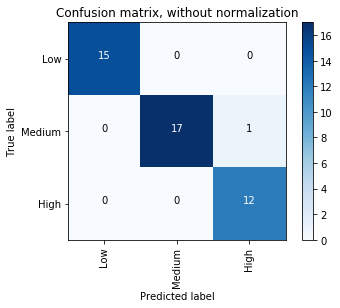

Fold 3
Accuracy=1.000
F1 score=1.0

Confusion matrix, without normalization
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


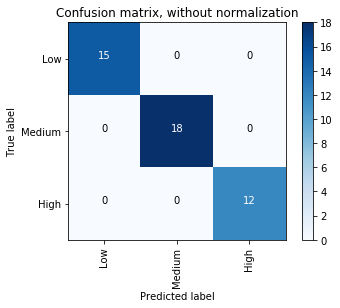

Fold 4
Accuracy=1.000
F1 score=1.0

Confusion matrix, without normalization
[[14  0  0]
 [ 0 17  0]
 [ 0  0 12]]


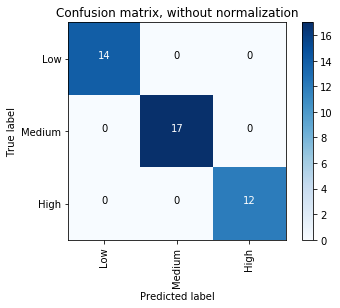

AVERAGE
Accuracy=0.983
F1 score=0.983



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import itertools
plt.figure()


kf = StratifiedKFold(n_splits=4)
i = 0
avg_acc = []
avg_f1 = []
for idx_train, idx_test in kf.split(X,y):
    X_train = X.loc[idx_train]
    X_test = X.loc[idx_test]
    y_train = y.loc[idx_train]
    y_test = y.loc[idx_test]
    lr_model = LogisticRegression(solver='newton-cg', multi_class='ovr')
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    avg_acc.append(acc)
    avg_f1.append(f1)
    print("Fold {}\nAccuracy={:.3f}\nF1 score={:.3}\n".format(i+1,acc,f1))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Low', 'Medium', 'High'],
                      title='Confusion matrix, without normalization')
    plt.show()
    i = i+1
    
print("AVERAGE\nAccuracy={:.3f}\nF1 score={:.3}\n".format(sum(avg_acc)/len(avg_acc),
                                                          sum(avg_f1)/len(avg_f1)))


# Ejemplo base de arquitectura de red neuronal para clasificación

Fold 1
Accuracy=0.667
F1 score=0.667

Confusion matrix, without normalization
[[15  0  0]
 [ 3 15  0]
 [12  0  0]]


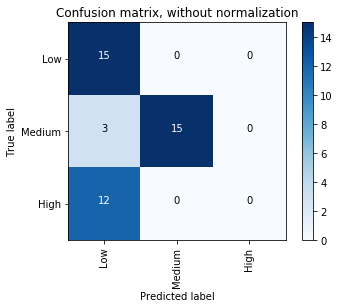

Fold 2
Accuracy=0.644
F1 score=0.644

Confusion matrix, without normalization
[[ 0 15  0]
 [ 0 17  1]
 [ 0  0 12]]


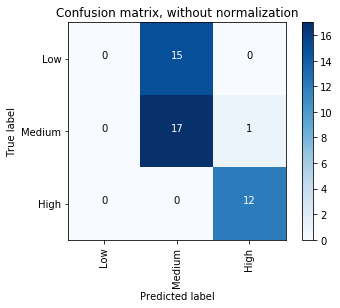

Fold 3
Accuracy=0.689
F1 score=0.689

Confusion matrix, without normalization
[[11  1  3]
 [ 0 18  0]
 [10  0  2]]


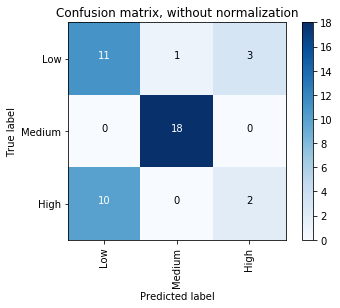

Fold 4
Accuracy=0.721
F1 score=0.721

Confusion matrix, without normalization
[[14  0  0]
 [ 0 17  0]
 [ 0 12  0]]


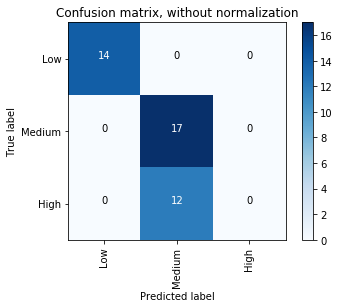

AVERAGE
Accuracy=0.680
F1 score=0.68



In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

nb_inputs = len(list(X.columns))
nb_targets = len(list(y.unique()))

X[:] = scaler.fit_transform(X.loc[:])

def get_model():
    model = Sequential()
    #Capa de entrada y oculta
    model.add(Dense(1, input_shape=(nb_inputs,), kernel_initializer='random_uniform'))
    model.add(Activation('relu'))
    
    #Capa de salida
    #Neuronas de salida igual a la cantidad de etiquetas
    model.add(Dense(nb_targets))
    model.add(Activation('softmax'))
    
    #Método de aprendizaje
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

    model.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

    


kf = StratifiedKFold(n_splits=4)
i = 0
avg_acc = []
avg_f1 = []
for idx_train, idx_test in kf.split(X,y):
    X_train = X.loc[idx_train]
    X_test = X.loc[idx_test]
    y_train = y.loc[idx_train]
    y_test = y.loc[idx_test]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    nn_model = get_model()
    
    
    #pd.get_dummies(y_train) Crea representación One-hot-encoding
    nn_model.fit(X_train, pd.get_dummies(y_train), epochs=100, verbose=False)
    y_pred = nn_model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)+1
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    avg_acc.append(acc)
    avg_f1.append(f1)
    print("Fold {}\nAccuracy={:.3f}\nF1 score={:.3}\n".format(i+1,acc,f1))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Low', 'Medium', 'High'],
                      title='Confusion matrix, without normalization')
    plt.show()
    i = i+1
    
print("AVERAGE\nAccuracy={:.3f}\nF1 score={:.3}\n".format(sum(avg_acc)/len(avg_acc),
                                                          sum(avg_f1)/len(avg_f1)))

